# Description:
This script focusses on fitting the S$\alpha$S distribution to
an ADC count distribution. The main part consists of an exploration of the
S$\alpha$S distribution followed by a manual fit of this distribution to a specific run
of data and a characterisation of the noise for a full station.

# Import modules:

In [1]:
import numpy as np
import scipy as sc
import scipy.fft as scfft
import matplotlib.pyplot as plt
import uproot
import os
import time
#%matplotlib widget
#%matplotlib notebook

In [2]:
%%capture out
%run /mnt/c/Users/Jethro/Desktop/Master\ Thesis/Functions.ipynb
%run /mnt/c/Users/Jethro/Desktop/RNO-G/GalaxyFunctions.ipynb

# Zero Averaged transit curves:

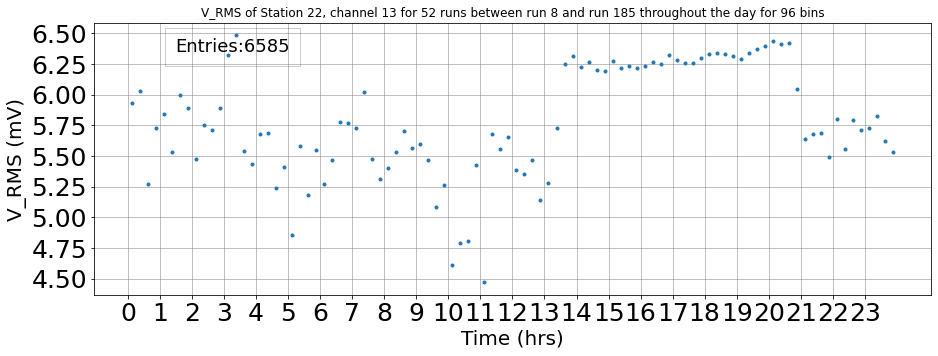

In [27]:
DailyVoltAvg(22,13,RunList,NBins=4*24)

With this we have succesfully mediated the peak structure present in the transit curve. <br>
Looking at the zero averaged transit curve for the other stations/channels:

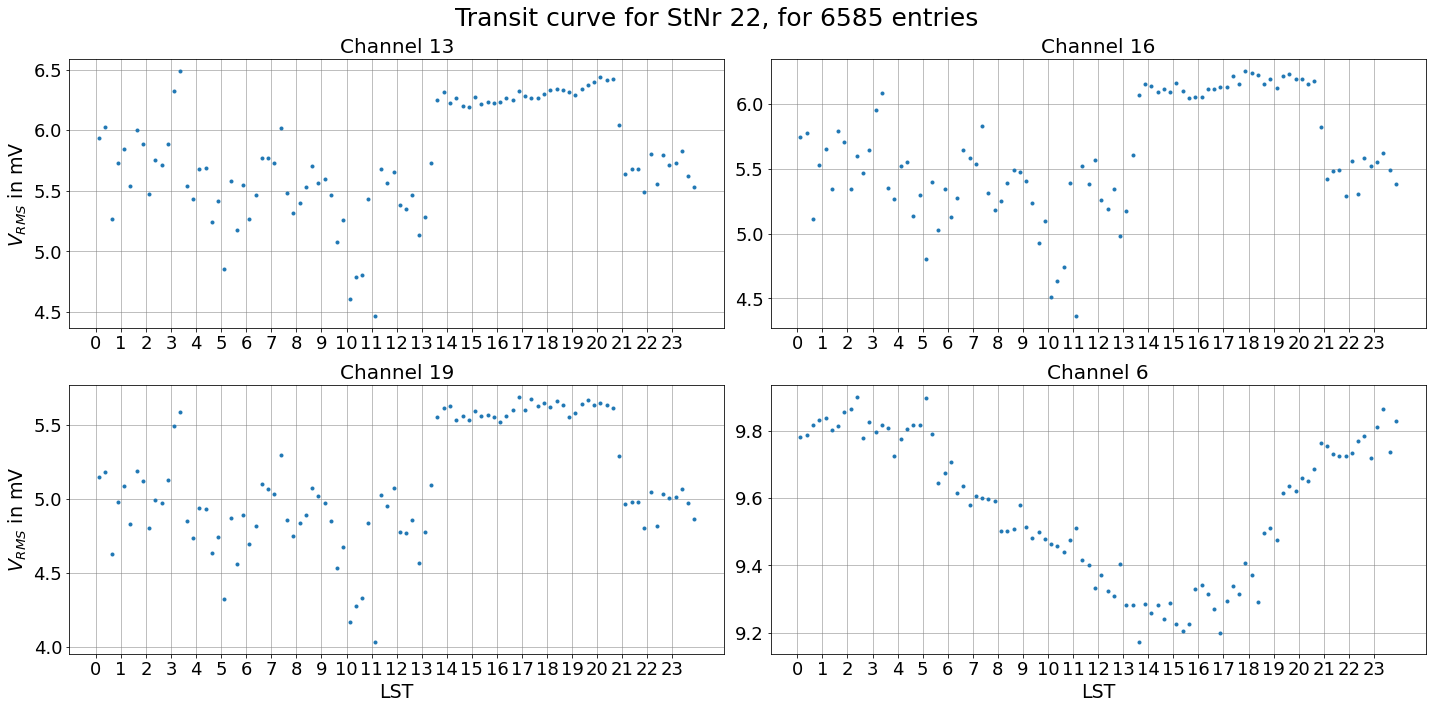

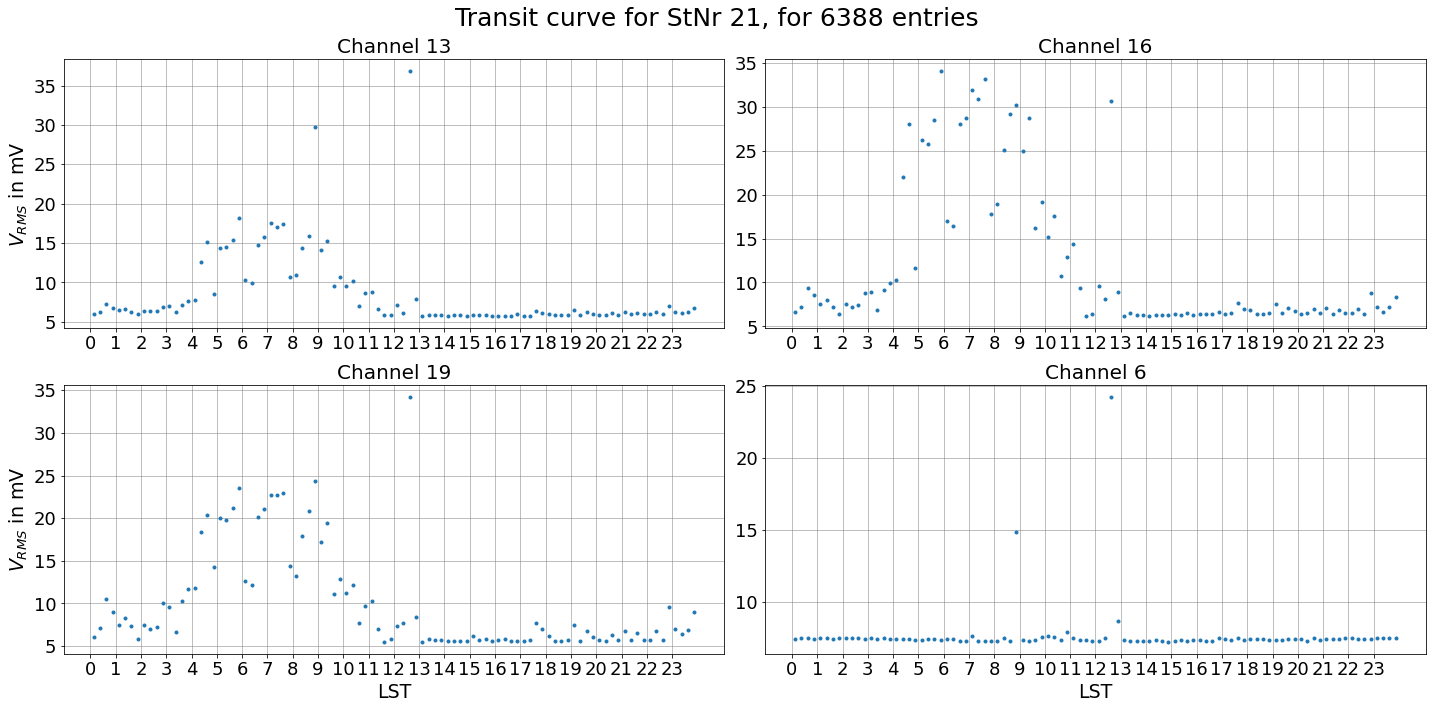

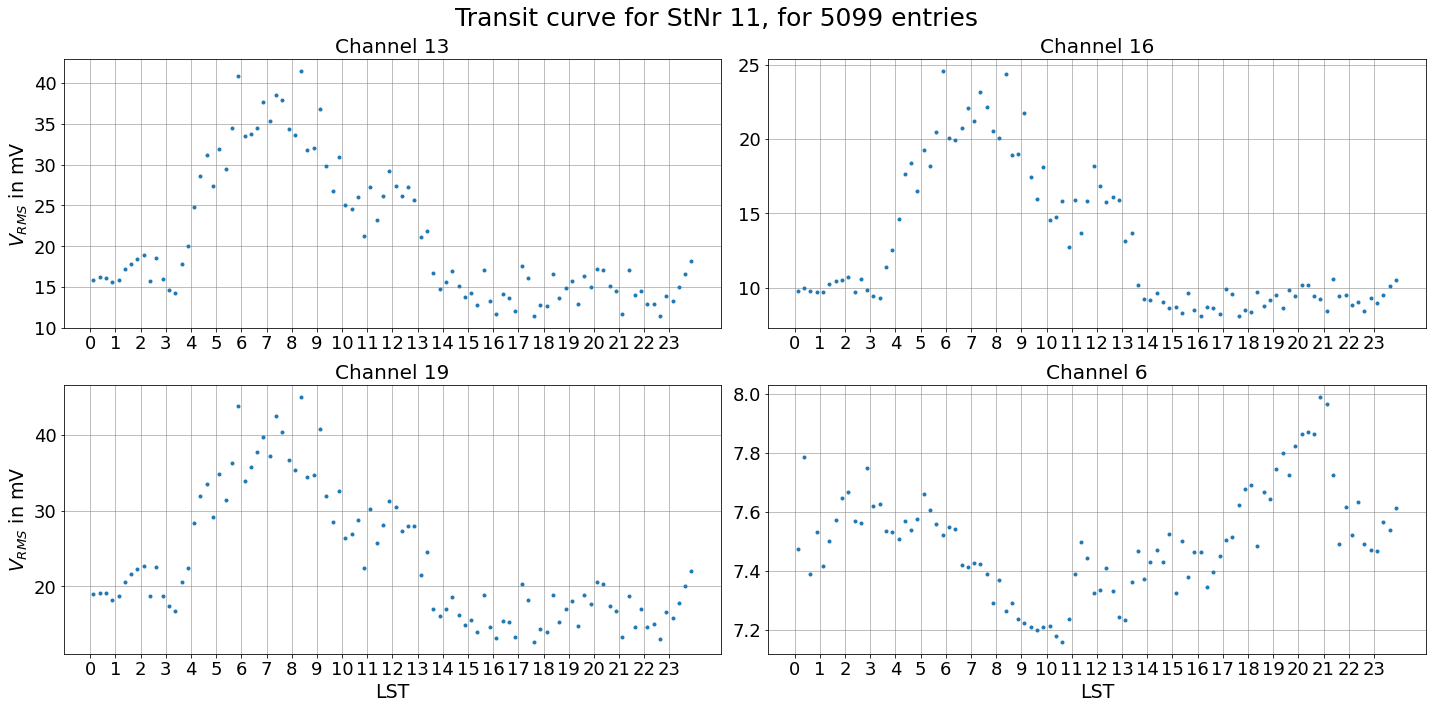

In [28]:
TransitCurves(22,6,RunList,NBins=4*24)
TransitCurves(21,6,[int(Run) for Run in RunListSt21],NBins=4*24)
TransitCurves(11,6,[int(Run) for Run in RunListSt11],NBins=4*24)

Compute with the Escudie of Lily formula what  the VRMS value should be!!!!

# Is transit curve structure still visible in september?:

Need to know how to filter events exactly, since Nick also filtered for his plot on some triggers but I couldn't figure this out from the TriggerInfo files <br>
filter op enkel forced trigger en geen andere triggers (zijn de kolommen in de run summary)(dus enkel metingen waar de "has_soft" kolom 1 is en de andere kolommen 0) <br>
**Viel mij op: sommige runs van Nick Runlist hebben ook "has_rf1"=1 (of "has_rf0"=1) e.g. St22 Run 163**

In [30]:
SepRunList=np.arange(547,573,dtype=int)
print(SepRunList)

[547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564
 565 566 567 568 569 570 571 572]


In [36]:
AugRunList=np.concatenate((np.arange(306,463,dtype=int),np.arange(464,546,dtype=int)))
print(AugRunList)

[306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 464 465 466 467 468
 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504
 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522
 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540
 541 542 543 544 545]


Berm pulsing was logged manually to the runs but this might have not occured at some point

Runs 555-746, september 1st to september 17th <br>
Nick: Neem data half augustus tot eind september

Meeting 15/11: <br>
- Onderzoek de pedestal values  bij de pieken (pieken tonen aan dat de gemiddelde waarde stijgt terwijl de data zero averaged zou moeten zijn door de pedestal methode), kijk tevens ook eens naar de waveforms met de pedestals terug toegevoegd.
- Bereken de $V_{RMS}$ met (V-$V_{mean}$)$^2$ ipv $V^2$ om de geleidelijke stijging tegen te gaan
- Vraag eens aan Cosmin of er tijdens de weird timetraces iets gebuerde/hij iets heeft gedaan

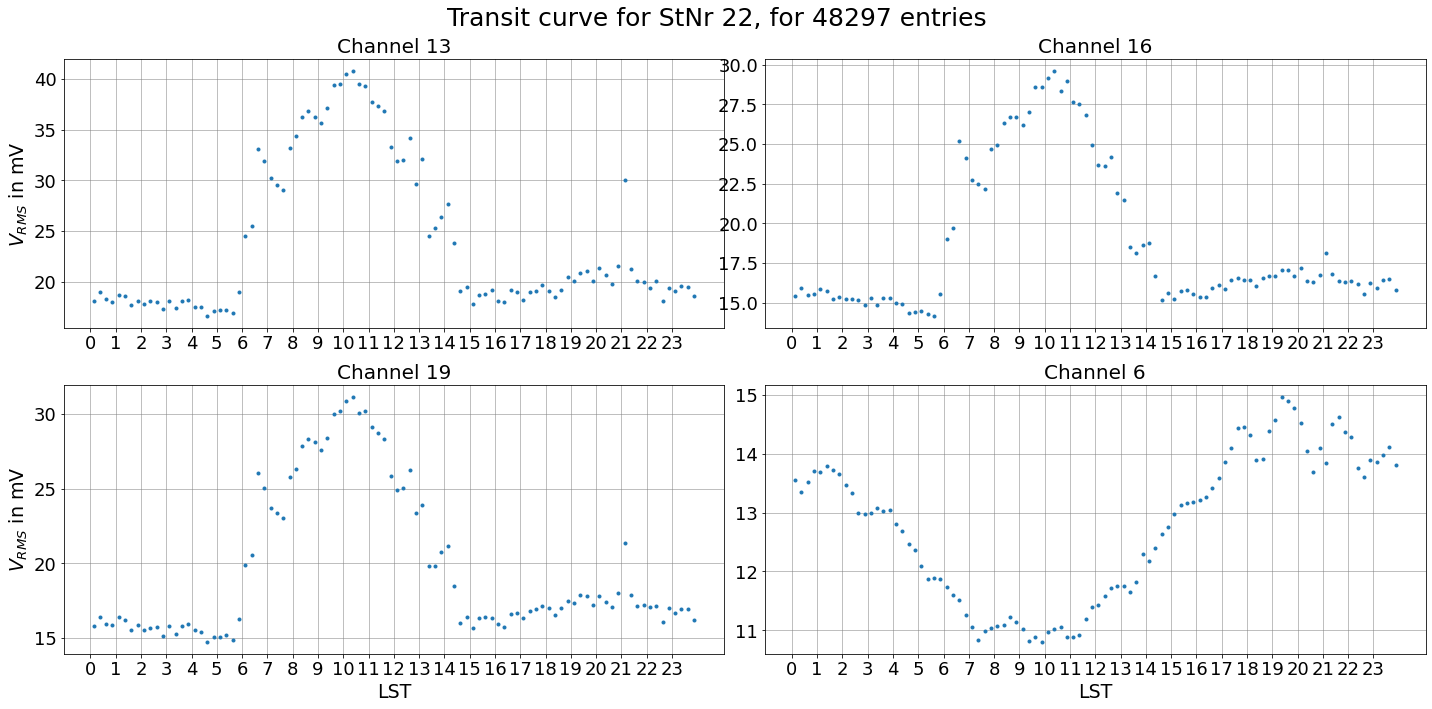

In [37]:
TransitCurves(22,6,AugRunList,NBins=4*24,ZeroAvg=False)

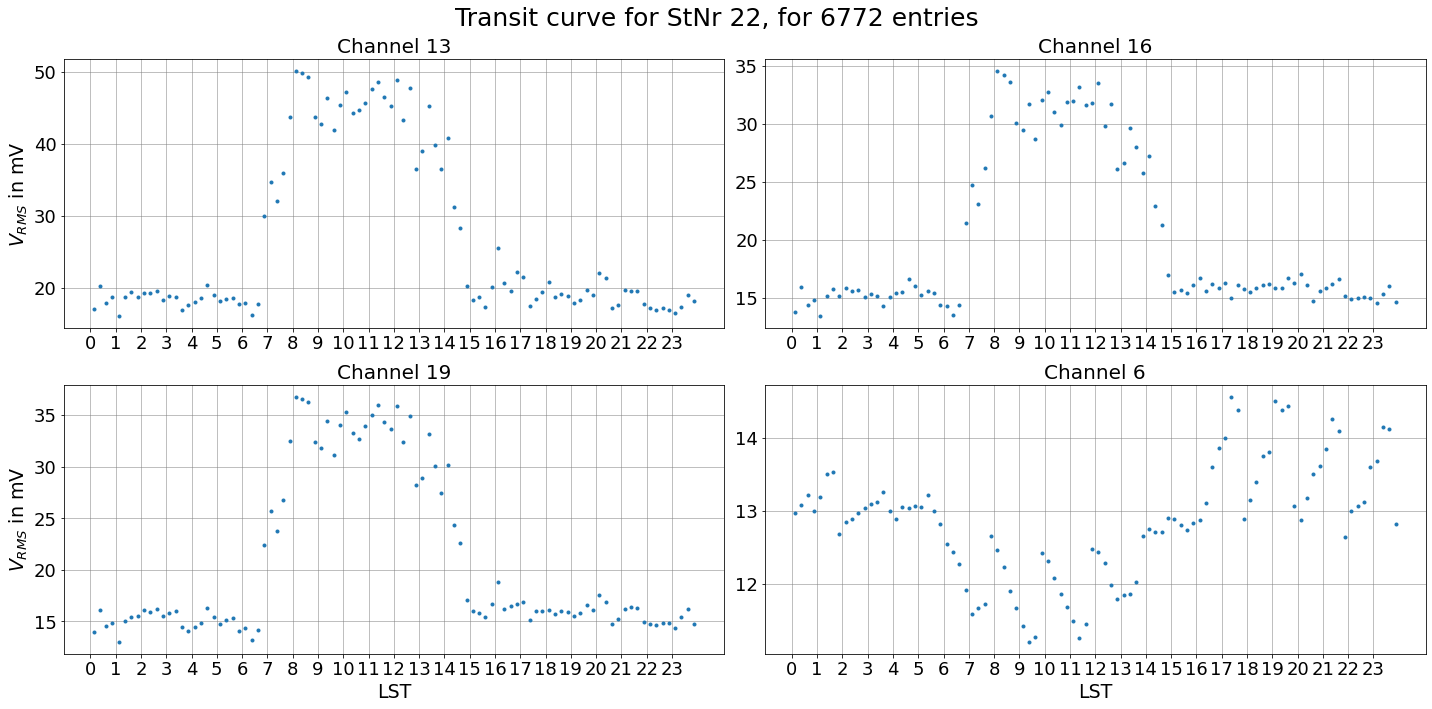

In [33]:
TransitCurves(22,6,SepRunList,NBins=4*24,ZeroAvg=False)

In the deeper channels we still see such a structure, however this structure is absent for the upwards facing LPDAs. <br>
The same plots but zero averaged:

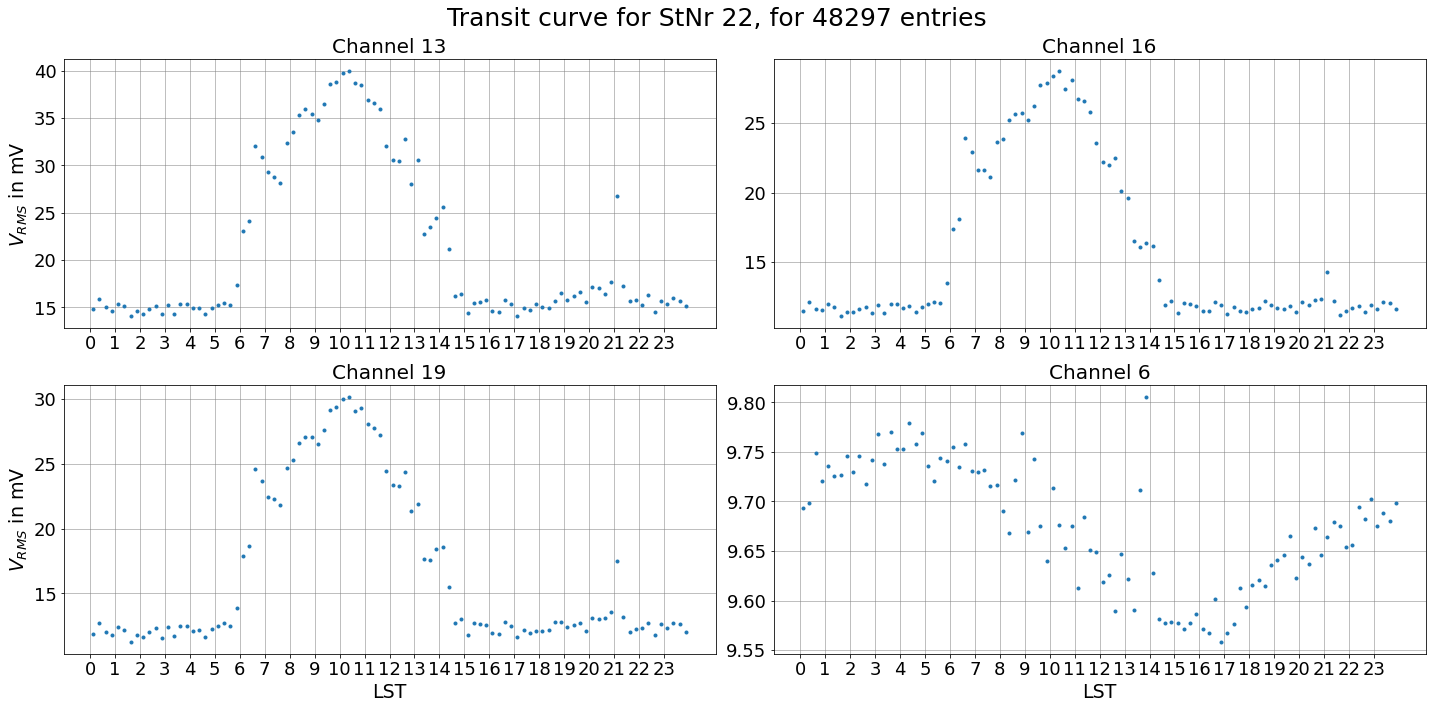

In [38]:
TransitCurves(22,6,AugRunList,NBins=4*24)

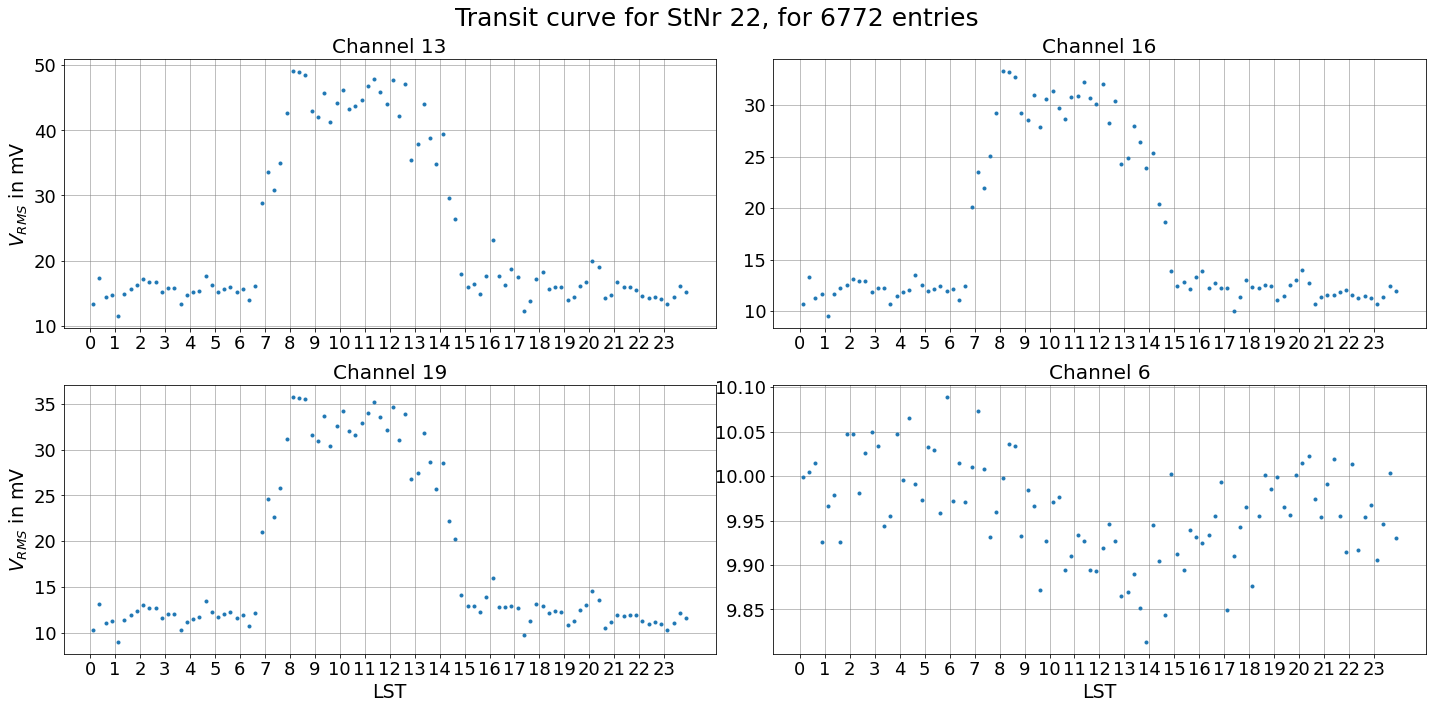

In [39]:
TransitCurves(22,6,SepRunList,NBins=4*24)

When looking at the LPDAs, we see that from 7hr to 15hr there is a big bump, similar as during the other months of the summer. The curve of Ch6 in August shows a nice sine wave which would be expected for galactic noise but this shouldn't be so prominent for a deep channel.